In [1]:
# Importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Creating a set of random latitude and longitude combinations
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Adding the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-21.591341177973618 -51.2486574992719
-54.22386241441415 -107.1803726099813
-36.55808383300375 -135.83277048151558
-79.08705775158197 40.31139617162853
14.379042470336827 35.023324228239034
81.5367740665863 -69.32493689370266
80.30381921582185 -173.61703778074468
87.87451718145437 39.0082836807008
34.50326473164942 120.15046455317929
25.70097796301293 -138.84671775448004
-31.191240105869767 40.72274352510766
53.425186690316394 -152.65817215221938
29.093939910956678 -91.64579761043696
-81.71985054111181 -99.59984665372467
70.16382359178397 60.65145411708224
-57.62846857706902 94.68740037775814
20.30660541292859 -173.56848261159323
-72.415870229217 172.1883014458109
-88.5776575339293 -164.67172860874828
-15.065385698484405 -127.81444560056357
60.807059071428796 -9.148588190631585
80.23018859230271 -58.49941558695572
12.033281009419426 82.9614703296379
-13.126676978036755 25.228208079027866
-11.450254861618959 46.39834594282519
22.088212822627185 138.28745373604323
-34.60437756701325 0.49

In [5]:
from citipy import citipy

# Creating a list for holding the cities
cities = []

# Identifying the nearest city for each latitude and longitude combination
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm the sufficient count
len(cities)

624

In [6]:
# Importing the requests library
import requests

# Importing the API key
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime 

# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pacaembu
Processing Record 2 of Set 1 | castro
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | port alfred
Processing Record 5 of Set 1 | doka
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 8 of Set 1 | vardo
Processing Record 9 of Set 1 | dongkan
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | beloha
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | morgan city
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | amderma
City not found. Skipping...
Processing Record 16 of Set 1 | busselton
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | sorvag
City not found. Skipping...
Processing Record 21 of Set 1 | upernavik
Processing Record 2

Processing Record 34 of Set 4 | sao miguel
Processing Record 35 of Set 4 | talara
Processing Record 36 of Set 4 | bandar
Processing Record 37 of Set 4 | hithadhoo
Processing Record 38 of Set 4 | bailen
Processing Record 39 of Set 4 | coos bay
Processing Record 40 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 41 of Set 4 | fortuna
Processing Record 42 of Set 4 | barrow
Processing Record 43 of Set 4 | conde
Processing Record 44 of Set 4 | itacoatiara
Processing Record 45 of Set 4 | badou
Processing Record 46 of Set 4 | broome
Processing Record 47 of Set 4 | faya
Processing Record 48 of Set 4 | cidreira
Processing Record 49 of Set 4 | coolum beach
Processing Record 50 of Set 4 | presidencia roque saenz pena
Processing Record 1 of Set 5 | flinders
Processing Record 2 of Set 5 | khlung
Processing Record 3 of Set 5 | black river
Processing Record 4 of Set 5 | puerto del rosario
Processing Record 5 of Set 5 | kusye-aleksandrovskiy
City not found. Skipping...
Processing 

Processing Record 24 of Set 8 | sitka
Processing Record 25 of Set 8 | phalaborwa
Processing Record 26 of Set 8 | abu dhabi
Processing Record 27 of Set 8 | pemba
Processing Record 28 of Set 8 | umm lajj
Processing Record 29 of Set 8 | lop buri
Processing Record 30 of Set 8 | provideniya
Processing Record 31 of Set 8 | zyryanka
Processing Record 32 of Set 8 | saldanha
Processing Record 33 of Set 8 | eregli
Processing Record 34 of Set 8 | maardu
Processing Record 35 of Set 8 | vao
Processing Record 36 of Set 8 | adrar
Processing Record 37 of Set 8 | betafo
Processing Record 38 of Set 8 | les cayes
Processing Record 39 of Set 8 | odweyne
Processing Record 40 of Set 8 | semey
Processing Record 41 of Set 8 | talnakh
Processing Record 42 of Set 8 | sao felix do xingu
Processing Record 43 of Set 8 | cockburn town
Processing Record 44 of Set 8 | tarko-sale
Processing Record 45 of Set 8 | port blair
Processing Record 46 of Set 8 | ho chi minh city
Processing Record 47 of Set 8 | tuskegee
Process

Processing Record 10 of Set 12 | ouegoa
Processing Record 11 of Set 12 | beringovskiy
Processing Record 12 of Set 12 | amuntai
Processing Record 13 of Set 12 | canutama
Processing Record 14 of Set 12 | coihaique
Processing Record 15 of Set 12 | dingle
Processing Record 16 of Set 12 | puno
Processing Record 17 of Set 12 | riyadh
Processing Record 18 of Set 12 | springdale
Processing Record 19 of Set 12 | vilyuysk
Processing Record 20 of Set 12 | oga
Processing Record 21 of Set 12 | lubbock
Processing Record 22 of Set 12 | zonguldak
Processing Record 23 of Set 12 | fairbanks
Processing Record 24 of Set 12 | alice springs
Processing Record 25 of Set 12 | boguchany
Processing Record 26 of Set 12 | shihezi
Processing Record 27 of Set 12 | vlasotince
Processing Record 28 of Set 12 | menongue
Processing Record 29 of Set 12 | gurgan
City not found. Skipping...
Processing Record 30 of Set 12 | hambantota
Processing Record 31 of Set 12 | yantal
Processing Record 32 of Set 12 | severnoye
Processi

In [9]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Pacaembu,-21.5622,-51.2606,77.85,36,0,5.99,BR,2022-11-26 22:06:47
1,Castro,-24.7911,-50.0119,60.37,97,100,7.61,BR,2022-11-26 22:06:47
2,Rikitea,-23.1203,-134.9692,75.56,71,100,6.35,PF,2022-11-26 22:06:48
3,Port Alfred,-33.5906,26.8910,62.19,92,61,2.44,ZA,2022-11-26 22:06:48
4,Doka,13.5167,35.7667,77.74,32,0,9.48,SD,2022-11-26 22:06:49


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pacaembu,BR,2022-11-26 22:06:47,-21.5622,-51.2606,77.85,36,0,5.99
1,Castro,BR,2022-11-26 22:06:47,-24.7911,-50.0119,60.37,97,100,7.61
2,Rikitea,PF,2022-11-26 22:06:48,-23.1203,-134.9692,75.56,71,100,6.35
3,Port Alfred,ZA,2022-11-26 22:06:48,-33.5906,26.8910,62.19,92,61,2.44
4,Doka,SD,2022-11-26 22:06:49,13.5167,35.7667,77.74,32,0,9.48
...,...,...,...,...,...,...,...,...,...
565,Yarim,YE,2022-11-26 22:22:22,14.2980,44.3779,48.29,48,3,4.54
566,Kandrian,PG,2022-11-26 22:22:22,-6.2167,149.5500,82.67,76,82,6.62
567,Aberdeen,GB,2022-11-26 22:18:56,57.1437,-2.0981,50.54,93,100,27.63
568,Ibra,OM,2022-11-26 22:22:23,22.6906,58.5334,68.74,62,0,3.42


In [11]:
# Creating the new output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the city_data into a CSV
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

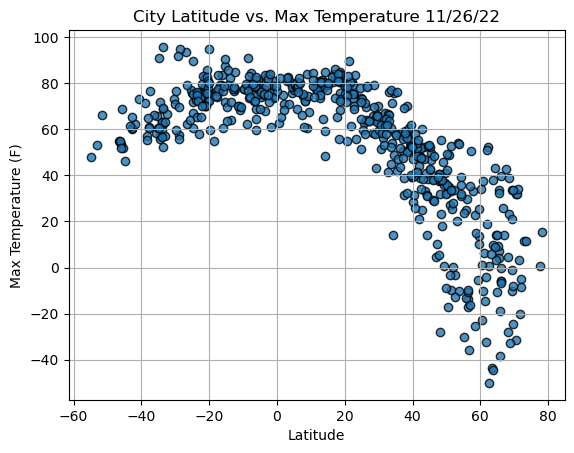

In [13]:
# Import the time module
import time

# Build the scatter plot for latitiude vs. longitude
plt.scatter(lats, max_temps, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Other graph properties
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Saving the figure
plt.savefig("weather_data/Fig1.png")

# Showing the plot
plt.show()

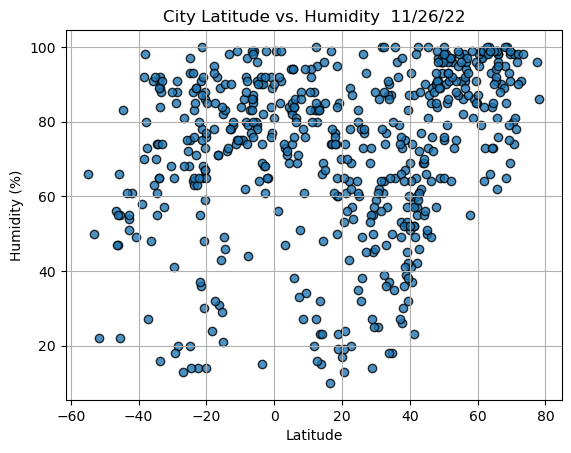

In [14]:
# Build the scatter plot for latitiude vs. humidity
plt.scatter(lats, humidity, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Other graph properties
plt.title(f"City Latitude vs. Humidity  " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Saving the figure
plt.savefig("weather_data/Fig2.png")

# Showing the plot
plt.show()

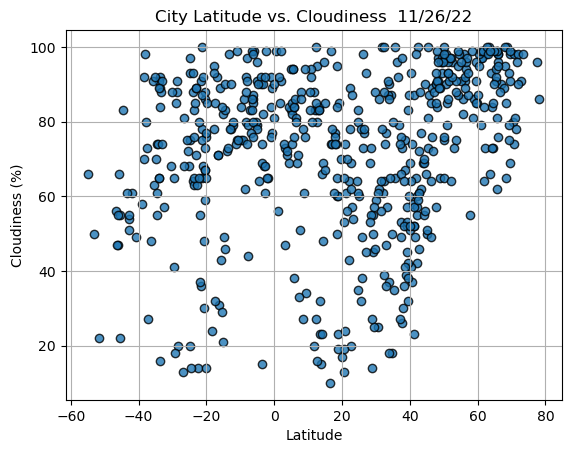

In [15]:
# Build the scatter plot for latitiude vs. cloudiness
plt.scatter(lats, humidity, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Other graph properties
plt.title(f"City Latitude vs. Cloudiness  " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Saving the figure
plt.savefig("weather_data/Fig3.png")

# Showing the plot
plt.show()

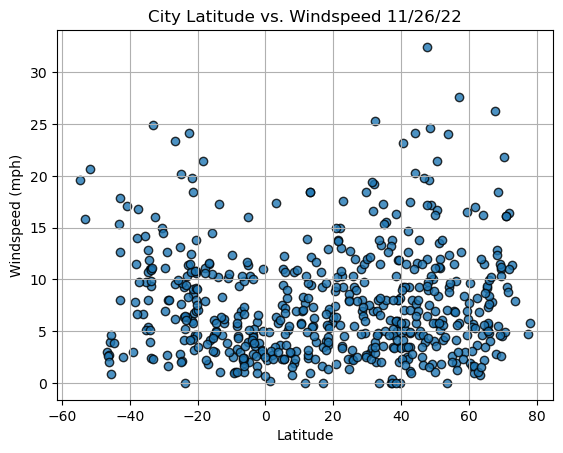

In [16]:
# Build the scatter plot for latitiude vs. wind speed
plt.scatter(lats, wind_speed, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label = "Cities")

# Other graph properties
plt.title(f"City Latitude vs. Windspeed " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.grid()

# Saving the figure
plt.savefig("weather_data/Fig4.png")

# Showing the plot
plt.show()

In [17]:
# Importing linregress
from scipy.stats import linregress


# Creating a function to perform linear regression on the weather data
# and plot the data, the linear regression line, and the equation of the linear regression line
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
# Creating the Northern and Southern Hemisphere dataframes
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

In [19]:
display(northern_hemi_df.head(2))
display(southern_hemi_df.head(2))

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
4,Doka,SD,2022-11-26 22:06:49,13.5167,35.7667,77.74,32,0,9.48
5,Qaanaaq,GL,2022-11-26 22:06:49,77.4840,-69.3632,0.63,96,100,4.74


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Pacaembu,BR,2022-11-26 22:06:47,-21.5622,-51.2606,77.85,36,0,5.99
1,Castro,BR,2022-11-26 22:06:47,-24.7911,-50.0119,60.37,97,100,7.61


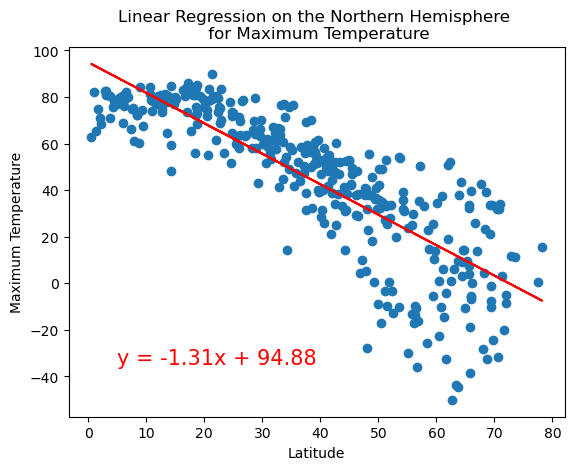

In [20]:
# Linear regression on the Northern Hemisphere for max temp

lat_values_north = northern_hemi_df["Lat"]
temp_values_north = northern_hemi_df["Max Temp"]

# Calling our function
plot_linear_regression(lat_values_north, temp_values_north,
                       "Linear Regression on the Northern Hemisphere \n for Maximum Temperature",
                       "Maximum Temperature", (5, -35))

In [21]:
# Checking r-values
linregress(lat_values_north, temp_values_north)

LinregressResult(slope=-1.3083173519080626, intercept=94.87694185472839, rvalue=-0.8278398647747269, pvalue=3.4703321447237085e-97, stderr=0.045538899411111305, intercept_stderr=1.9377382184624687)

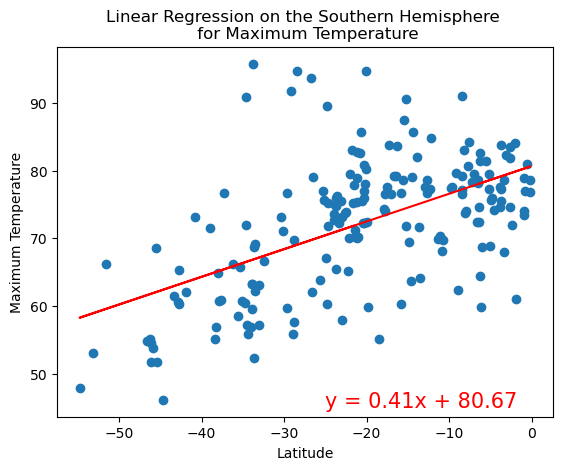

In [22]:
# Linear regression on the Southern Hemisphere for max temp
lat_values_south = southern_hemi_df["Lat"]
temp_values_south = southern_hemi_df["Max Temp"]

# Calling our function
plot_linear_regression(lat_values_south, temp_values_south,
                       "Linear Regression on the Southern Hemisphere \n for Maximum Temperature",
                      "Maximum Temperature", (-25, 45))

In [23]:
# Checking r-values
linregress(lat_values_south, temp_values_south)

LinregressResult(slope=0.40884966787840926, intercept=80.67440158118578, rvalue=0.5451155470094121, pvalue=5.073127960131146e-16, stderr=0.045981729855204705, intercept_stderr=1.1246555343480507)

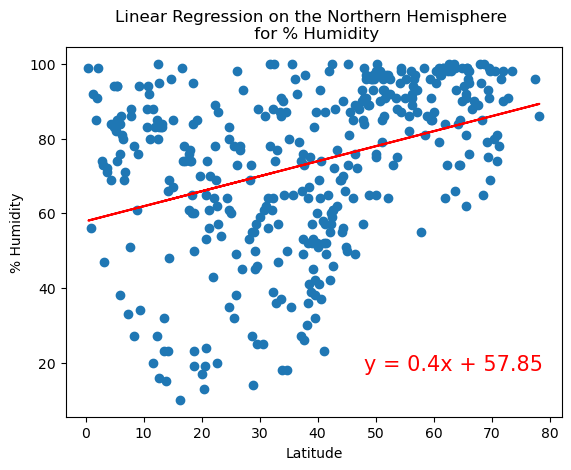

In [24]:
# Linear regression on the Northern Hemisphere for percent humidity
lat_values_north = northern_hemi_df["Lat"]
humidity_values_north = northern_hemi_df["Humidity"]

# Calling our function
plot_linear_regression(lat_values_north, humidity_values_north, 
                       "Linear Regression on the Northern Hemisphere \n for % Humidity",
                       "% Humidity", (48, 18))

In [25]:
# Checking r-values
linregress(lat_values_north, humidity_values_north)

LinregressResult(slope=0.4021800475115798, intercept=57.84726321361143, rvalue=0.35477442407983617, pvalue=9.636804867118112e-13, stderr=0.05444247921543424, intercept_stderr=2.316596888546128)

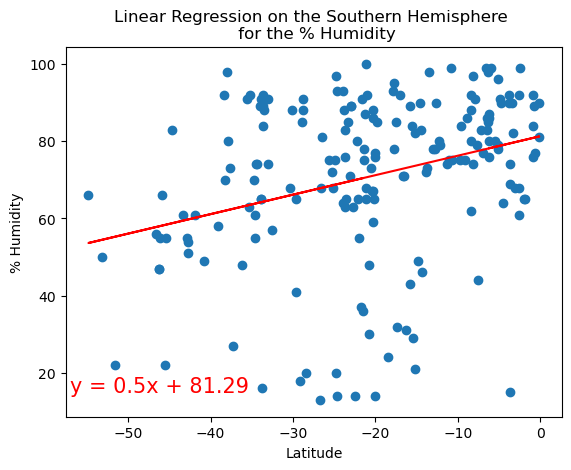

In [26]:
# Linear regression on the Southern Hemisphere for the percent humidity
lat_values_south = southern_hemi_df["Lat"]
humidity_values_south = southern_hemi_df["Humidity"]

# Calling our function
plot_linear_regression(lat_values_south, humidity_values_south, 
                       "Linear Regression on the Southern Hemisphere \n for the % Humidity",
                      "% Humidity", (-57, 15))

In [27]:
# Checking r-values
linregress(lat_values_south, humidity_values_south)

LinregressResult(slope=0.5047981572982315, intercept=81.2937850894566, rvalue=0.30975137511940964, pvalue=1.442553189275755e-05, stderr=0.11331330875609591, intercept_stderr=2.7715016422638534)

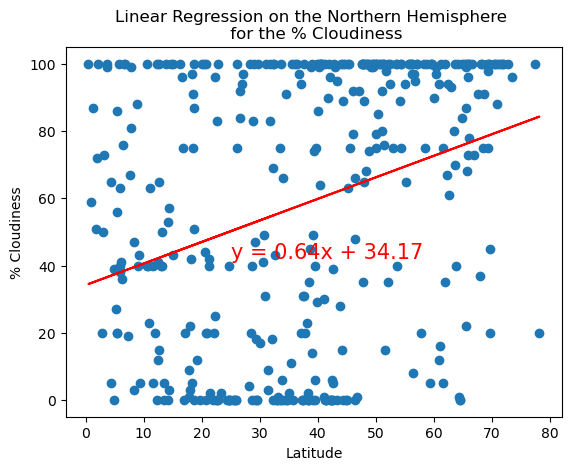

In [28]:
# Linear regression on the Northern Hemisphere for the percent cloudiness
lat_values_north = northern_hemi_df["Lat"]
cloudiness_values_north = northern_hemi_df["Cloudiness"]

# Calling our function
plot_linear_regression(lat_values_north, cloudiness_values_north, 
                       "Linear Regression on the Northern Hemisphere \n for the % Cloudiness",
                      "% Cloudiness", (25, 42))

In [29]:
# Checking r-values
linregress(lat_values_north, cloudiness_values_north)

LinregressResult(slope=0.6411822319384803, intercept=34.17073174901951, rvalue=0.31315973584211604, pvalue=4.092521335139228e-10, stderr=0.0998809370580505, intercept_stderr=4.250061190236078)

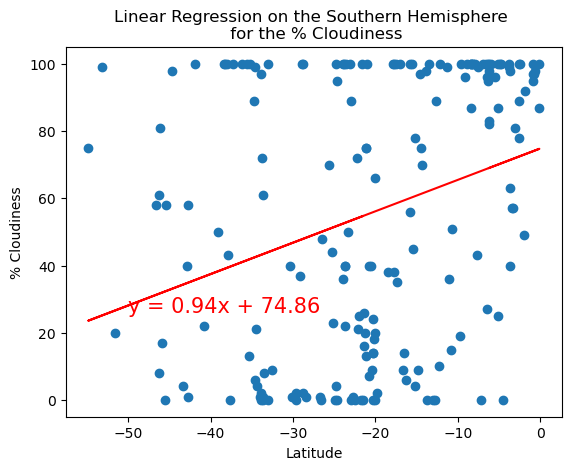

In [30]:
# Linear regression on the Southern Hemisphere for the percent cloudiness
lat_values_south = southern_hemi_df["Lat"]
cloudiness_values_south = southern_hemi_df["Cloudiness"]

# Calling our function
plot_linear_regression(lat_values_south, cloudiness_values_south, "Linear Regression on the Southern Hemisphere \n for the % Cloudiness",
                      "% Cloudiness", (-50, 26))

In [31]:
# Checking r-values
linregress(lat_values_south, cloudiness_values_south)

LinregressResult(slope=0.9354340498094544, intercept=74.86161623065703, rvalue=0.3058218974296877, pvalue=1.873587337440081e-05, stderr=0.21296156072135114, intercept_stderr=5.208773106685457)

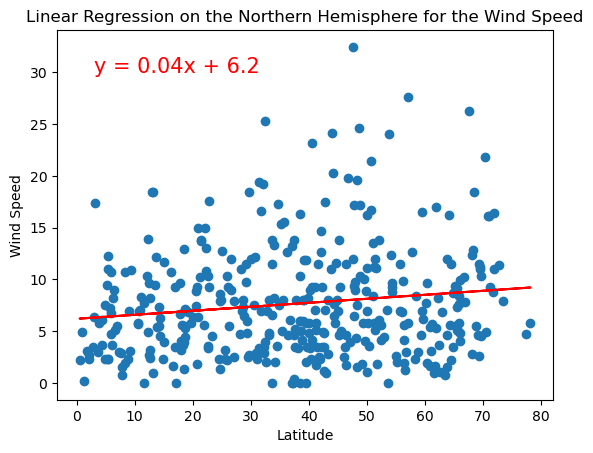

In [32]:
# Linear regression on the Northern Hemisphere for the wind speed
lat_values_north = northern_hemi_df["Lat"]
wind_values_north = northern_hemi_df["Wind Speed"]

# Calling our function
plot_linear_regression(lat_values_north, wind_values_north, "Linear Regression on the Northern Hemisphere for the Wind Speed",
                      "Wind Speed", (3, 30))

In [33]:
# Checking r-values
linregress(lat_values_north, wind_values_north)

LinregressResult(slope=0.03862402390947664, intercept=6.196119562210556, rvalue=0.142367442987564, pvalue=0.00536988582097809, stderr=0.013793699662723579, intercept_stderr=0.5869395035034747)

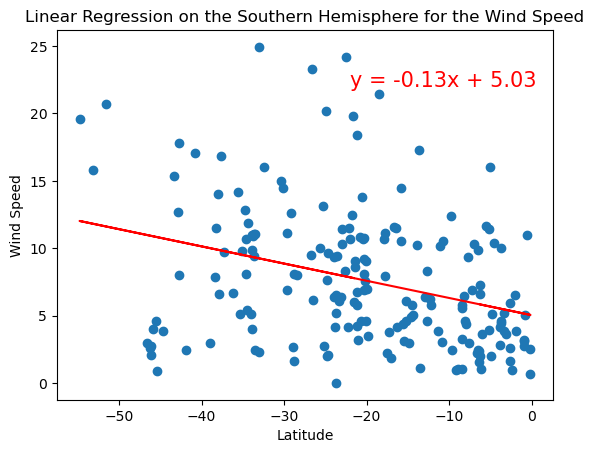

In [34]:
# Linear regression on the Southern Hemisphere for the wind speed
lat_values_south = southern_hemi_df["Lat"]
wind_values_south = southern_hemi_df["Wind Speed"]

# Calling our function
plot_linear_regression(lat_values_south, wind_values_south, "Linear Regression on the Southern Hemisphere for the Wind Speed",
                      "Wind Speed", (-22, 22))

In [35]:
# Checking r-values
linregress(lat_values_south, wind_values_south)

LinregressResult(slope=-0.1275836652767275, intercept=5.030799350453333, rvalue=-0.3277427494925579, pvalue=4.152064313274721e-06, stderr=0.026894649901747274, intercept_stderr=0.6578094593570325)